In [9]:
from shapely.geometry import MultiLineString, MultiPolygon
import geopandas as gpd
import pandas as pd
import osmnx as ox
import os

os.chdir('/home/happy956/final_relocation/')

In [17]:
grids = gpd.read_file('data/grid.json')
grids

index                                           geometry
0        0  POLYGON ((127.24602 36.27352, 127.25716 36.273...
1        1  POLYGON ((127.24599 36.28253, 127.25713 36.282...
2        2  POLYGON ((127.24597 36.29155, 127.25710 36.291...
3        3  POLYGON ((127.25719 36.26452, 127.26832 36.264...
4        4  POLYGON ((127.25716 36.27354, 127.26829 36.273...
..     ...                                                ...
620    620  POLYGON ((127.53556 36.40000, 127.54672 36.399...
621    621  POLYGON ((127.53557 36.40901, 127.54672 36.409...
622    622  POLYGON ((127.53557 36.41803, 127.54673 36.418...
623    623  POLYGON ((127.54671 36.39098, 127.55786 36.390...
624    624  POLYGON ((127.54672 36.39999, 127.55787 36.399...

[625 rows x 2 columns]

In [7]:
custom_filter = '["highway"~"primary|secondary|tertiary"]'
graph = ox.graph_from_place('대전, 대한민국', network_type='drive', custom_filter=custom_filter)
edges = ox.graph_to_gdfs(graph, nodes=False)
edge_geometry = edges.reset_index()['geometry'].tolist()

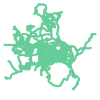

In [13]:
edges = MultiLineString(edge_geometry)
edges

In [19]:
res = grids['geometry'].map(lambda x: x.intersection(edges))

In [23]:
res.map(lambda x: x.is_empty)

0      True
1      True
2      True
3      True
4      True
       ... 
620    True
621    True
622    True
623    True
624    True
Name: geometry, Length: 625, dtype: bool

In [32]:
from folium import Map, Polygon as fp, PolyLine

m = Map(location=[36, 127])

## grid
for data in grids['geometry'][res.map(lambda x: x.is_empty)]:
    geometry = list(map(lambda x: x[::-1], list(data.exterior.coords)))
    fp(locations=geometry).add_to(m)

## grid
for data in grids['geometry'][~res.map(lambda x: x.is_empty)]:
    geometry = list(map(lambda x: x[::-1], list(data.exterior.coords)))
    fp(locations=geometry, color='orange').add_to(m)

## edge
for data in edge_geometry:
    geometry = list(map(lambda x: x[::-1], list(data.coords)))
    PolyLine(locations=geometry, color='red').add_to(m)

m

In [24]:
grids['geometry'][res.map(lambda x: x.is_empty)]

0      POLYGON ((127.24602 36.27352, 127.25716 36.273...
1      POLYGON ((127.24599 36.28253, 127.25713 36.282...
2      POLYGON ((127.24597 36.29155, 127.25710 36.291...
3      POLYGON ((127.25719 36.26452, 127.26832 36.264...
4      POLYGON ((127.25716 36.27354, 127.26829 36.273...
                             ...                        
620    POLYGON ((127.53556 36.40000, 127.54672 36.399...
621    POLYGON ((127.53557 36.40901, 127.54672 36.409...
622    POLYGON ((127.53557 36.41803, 127.54673 36.418...
623    POLYGON ((127.54671 36.39098, 127.55786 36.390...
624    POLYGON ((127.54672 36.39999, 127.55787 36.399...
Name: geometry, Length: 338, dtype: geometry